基于西游记训练一个nanoGPT

## 读取数据集

In [89]:
dir='./data/Xiyou.txt'
with open(dir,'r',encoding='utf-8') as f:
    text=f.read()

In [90]:
print(f"西游记全书字符串数量： {len(text)}")

西游记全书字符串数量： 722142


In [91]:
#here are the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(f'\n西游记一共有 {vocab_size} 不同的字符')


 "()*+-.7:CQW[]^_acghijmnosuw{|īω—‘’“”…□　、。《》【】一丁七万丈三上下不与丑专且丕世丘丙业丛东丝丞丢两严丧个丫中丰串临丸丹为主丽举乃久么义之乌乍乎乏乐乒乓乔乖乘乙乜九乞也习乡书买乱乳乾了予争事二于亏云互五井亘亚些亡亢交亥亦产亨亩享京亭亮亲亵人亿什仁仃仅仆仇今介仍从仑仓仔他仗付仙仞代令以仪们仰仲仵件价任仿伉伊伍伏伐休众优伙会伞伟传伤伦伪伫伯估伴伶伸伺似伽佃但佇位低住佐佑体何余佛作佞你佣佥佩佯佳使侄侈例侍供依侠侣侥侧侪侮侯侵便促俄俊俎俏俐俗俚保俟信俦俨俪俫俭修俯俱俸俺倈倍倏倐倒倘候倚倜借倥倦倨倩债值倾偃假偈偌偎偏做停健偶偷偿傀傅傍傞傥储傩催傲傻像僚僝僧僭僮僵僻僽儒儡儾儿兀允元兄充兆先光克免兑兔兕党兜兢入全八公六兮兰共关兴兵其具典兹养兼兽冀内冈冉再冒冕冗写军农冠冢冤冥冬冯冰冲决况冷冻冽净凄准凉凋凌减凑凛凝几凡凤凫凭凯凰凳凶凸凹出击函凿刀刁刃分切刎刑划列刘则刚创初删判刨利别刬刮到刳制刷券刹刺刻刽剁剂剃削剌前剐剑剔剖剜剥剩剪副割剽剿劈劖劚力劝办功加务劣动助努劫劬劲劳势勅勇勉勋勒勘募勣勤勺勾勿匀包匆化北匙匝匠匡匣匹区医匾匿十千升午卉半华协卑卒卓单卖南博卜卞占卢卤卦卧卫卮卯印危即却卵卷卸卺卿厂厄厅历厉压厌厕厘厚原厢厦厨厮去县参叆叇又叉及友双反发叔取受变叙叛叟叠口古句另叨叩只叫召叭叮可台叱史右叵叶号司叹吁吃各吅吆合吉吊同名后吏吐向吒吓吕君吝吞吟吠否吧吩含听吮启吴吵吸吹吼吽吾呀呆呈告呐呕呖员呜呢呦周呱味呵呻呼命咀咂咄咆咇咋和咎咏咐咒咙咚咛咤咦咧咨咪咬咱咳咶咸咽咿哀品哂哃哄哇哈哉响哏哑哕哗哜哝哥哦哨哩哪哭哮哲哺哼哽唆唇唉唎唏唐唝唠唣唤唧唬唯唱唳唵唾唿啃啄啅商啈啊啐啕啖啭啮啯啸啻啼啾喁喂喃善喇喉喊喋喏喑喔喘喙喜喝喧喨喳喷嗅嗉嗒嗓嗔嗗嗛嗟嗣嗤嗳嗽嘈嘉嘎嘑嘘嘛嘤嘬嘱嘲嘴嘶嘹嘻噀噇噘噙噤器噪噫噬噹嚎嚏嚓嚣嚷嚼囊囒囔囚四回囟因团囫园困囱围囵固国图圃圆圈圊圜圞土圣在圩圭圯地场址坂均坊坎坏坐坑块坚坛坞坟坠坡坤坦坫坯垂垒垓垛垢垣垫埂埃埋城域埠培基堂堆堑堕堡堤堪堰堵塌塑塔塘塞填塵墀境墓墙增墟墨墩壁壅壑壤士壬壮声壳壶处备复夏夕外夙多夜够夤大天太夫夬夭央夯失头夷夸夹夺奁奇奈奉奋奎奏契奔奕奖套奘奠奢奥女奴奶奸好妁如妃妄妆妇妈妍妒妓妖妙妨妩妪妲妹妻妾姆姊始姌姐姑姓委姚姜姢姨姬姮姹姻姿威娃娄娆娇娉娑娘娜娟娥娩娱娲娶娼婆婚婢婪婴婵婷婿媒媚媳媸媾嫁嫂嫉嫌嫔嫖嫡嫣嫦嫩嫱嬉嬝孀子

为了方便只取一半的text来训练

In [92]:
n=int(0.5*len(text))
text=text[:n]
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(f'\n一半西游记一共有 {vocab_size} 不同的字符')


 "()*+.7:Q[]^_acghijmnosu|īω—‘’“”…□　、。《》【】一丁七万丈三上下不与丑专且丕世丘丙业丛东丝丞丢两严丧个丫中丰串临丸丹为主丽举乃久么义之乌乍乎乐乒乓乔乖乘乙九乞也习乡书买乱乳乾了予争事二于亏云五井亘亚些亡亢交亥亦产亩享京亭亮亲人亿什仁仃仅仆仇今介仍从仑仓仔他仗付仙仞代令以仪们仰仲仵件价任仿伉伊伍伏伐休众优伙会伞伟传伤伦伪伫伯估伴伶伸伺似伽但佇位低住佐佑体何余佛作佞你佣佩佯佳使侄侈例侍供依侣侥侧侮侯侵便促俊俏俐俗俚保俟信俨俫俭修俯俱俸俺倍倏倒倘候倚借倥倦倨倩债值倾假偈偌偎偏做停健偶偷偿傀傅傍储傩催傲傻像僧僭僮僵僻儒儡儿兀允元兄充先光克免兑兔兕党兜兢入全八公六兮兰共关兴兵其具典兹养兼兽内冉再冒冕写军农冠冤冥冬冰冲决况冷冻冽净凄准凉凋凌减凑凛凝几凡凤凭凯凰凳凶凸凹出击函凿刀刁刃分切刎刑划列刘则刚创初判刨利别刬刮到刳制刷券刹刺刻刽剁剂剃削剌前剐剑剔剖剜剥剩剪副割剿劈劖劚力劝办功加务劣动助努劫劬劳势勅勇勉勋勒勘募勣勤勾勿匀包化北匙匝匠匡匣匹区医匾十千升午卉半华协卑卒单卖南博卜卞占卢卤卦卧卫卮卯印危即却卵卷卸卿厄厅历厉压厌厕厘厚原厢厦厨厮去县参叆叇又叉及友双反发叔取受变叙叛叟叠口古句另叨叩只叫召叭叮可台叱史右叵叶号司叹吁吃各吅吆合吉吊同名后吏吐向吒吓吕君吞吟吠否吧吩含听启吴吵吸吹吼吽吾呀呆呈告呐呖员呢周味呵呻呼命咀咂咄咆咇咋和咎咏咐咒咙咛咤咦咧咨咪咬咱咳咶咸咽咿哀品哂哄哈哉响哏哑哗哜哝哥哦哨哩哪哭哮哺哼哽唆唇唉唏唐唠唣唤唧唬唯唱唳唵唾唿啃啄啅商啊啕啖啭啮啯啸啻啼喂善喇喉喊喋喏喑喘喙喜喝喧喨喳喷嗅嗉嗒嗔嗗嗟嗣嗤嗳嗽嘈嘉嘑嘘嘛嘤嘱嘲嘴嘶嘹嘻噀噇噙噤器噪噫噬噹嚎嚏嚓嚣嚷嚼囊囚四回囟因团囫园困围囵固国图圃圆圈圜圞土圣在圩圭圯地场坂均坊坎坏坐坑块坚坛坟坠坡坤坦坫坯垂垒垓垢垣垫埃埋城域埠培基堂堆堑堕堡堤堪堰塌塑塔塘塞填塵墀境墓墙增墨墩壁壅壑壤士壮声壳壶处备复夏夕外多夜够大天太夫夬夭央夯失头夷夸夹夺奁奇奈奉奋奎奏契奔奕奖套奘奠奢奥女奴奶奸好如妃妄妆妇妈妍妒妖妙妨妪妹妻妾姆姊始姐姑姓委姚姜姢姨姬姹姻姿威娃娄娆娇娘娥娩娱娲娶婆婚婢婪婴婿媒媚媳嫁嫂嫉嫌嫔嫡嫦嫩嬉孀子孔孕字存孙孜孝孟季孤学孩孺孽宁宅宇守安宋完宏宗官宙定宛宜宝实宠审客宣室宥宪宫宰害宴宵家容宽宾宿寂寄寅密寇富寐寒寓寝寞察寡寥寨寮寰寸对寺寻导寿封射将尉尊小少尔尖尘尚尝尧尪尬就尴尸尺尻尼尽尾尿局屁层居屈屉

取一半语料对字符损失不大，可以接受

## 分词器

In [93]:
###Tokenizers
# create a mapping from characters to integers
stoi = {ch: i for i, ch in enumerate(chars)}#str to idx
itos = {i: ch for i, ch in enumerate(chars)}#idx to str
encode = lambda s: [stoi[c] for c in s]
decode = lambda l: ''.join(itos[c] for c in l)

In [94]:
print(encode('孙悟空是齐天大圣'))
print(decode(encode('孙悟空是齐天大圣')))

[904, 1252, 2516, 1622, 3987, 805, 804, 727]
孙悟空是齐天大圣


## 训练，验证集划分

之所以要使用Torch，是因为我们训练这个东西是基于梯度优化来的。而当我们将每个变量转化成torch的Tensor变量，每一个Tensor会自带一个自己的梯度。

In [95]:
import torch
data = torch.tensor(encode(text),dtype=torch.long)#这两个参数是什么意思？#这个函数在干嘛？
print(data.shape, data.dtype)
# print(data[:1000])

torch.Size([361071]) torch.int64


前90%为训练数据，后10%数据为测试数据

In [96]:
n = int(0.9*len(data))
train_data = data[:n]#训练集
val_data = data[n:]#验证集

## 模型参数配置

In [97]:
device = 'cpu'#模型运行设备
block_size = 16#每个单元的最大长度(Sequence/Time Dimension)
batch_size = 4#同时运行的批次大小
vocab_size = vocab_size#前文已经获取该参数，指的是我们的训练语料中出现的词汇的数量的大小

learning_rate = 0.3
max_iters=1000

eval_interval=300#对当前模型运行结果进行评估的epoch数量

### Batch的概念

- Batch
    -  在深度网络传播过程中，我们无法将所有的数据一次性加载到网络中
    -  因此我们需要分批进行，也即每次执行一个batch大小的数据，而这里的batch大小我们称之为batch_size
    -  在通常的任务中，我们一般通过构建Dataset和DataLoader来实现数据的分批次传入
    - 但是nanoGPT作为致力于极简实现GPT的项目，选择自己谢get-batch操作
    - 也是这个时候，我们引入模型参数的概念

get_batch()函数生成batch的逻辑：
1. 在（0，len(data)-block_size）区间内，生成batch_size个随机数作为索引；
2. 从抽取的索引处开始到索引+block_size个元素作为一个样本/序列/句子（这是为什么步骤1中需要减去“block_size”的原因，以避免索引越界）。将batch_size个样本拼接起来作为x
3. 以步骤2相同逻辑生成样本y，只是y的元素相比x需要保持一个位置的偏置（整体右移一个token）

In [98]:
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split =='train' else val_data#输入训练数据/验证数据
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y

## 模型部分

### 关于nn.Embedding

nn.Embedding转换逻辑：

input -> one-hot -> logits（onehot过于绝对，logits能引入更多的信息）

见下图

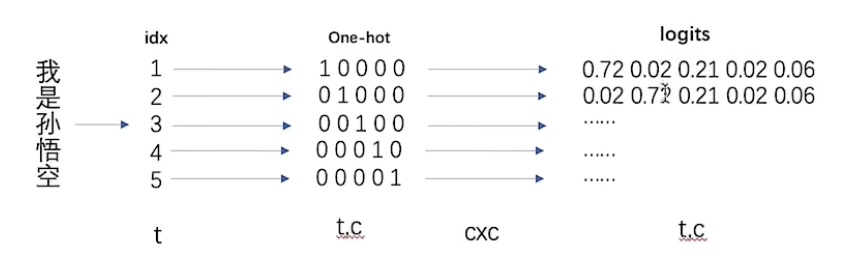

In [99]:
from IPython.display import Image 
Image(filename="./img/embedding.jpg",width=400,height=400)

### 二元预测模型

In [100]:
import torch
import torch.nn as nn
from torch.nn import functional as F


#### 重要变量解释

*vocab_size*: 之前计算过的，语料库中所有的字符数量

*idx*: 是我们之间的x的下标，

*targets*:是之前的y,从而执行生成的过程

*F.cross_entropy*: 交叉熵函数 (负对数似然损失(negative log likelihood loss)衡量损失或预测质量，它也在PyTorch中以交叉熵的名称实现)

#### 一些重要代码的大白话解释

- forward()函数：


    logits = self.token_embedding_table(idx)：Batch_size个样本集合，每个集合中有T个句子（样本）；现在通过embedding表（onehot + 矩阵乘法）将每个样本的token都转换成了高维词向量。
    

    logits = logits.view(B*T, C)：取消batch的概念，合并在一起。一个联想例子帮助理解：一开始学生都在教室里，后面是有活动，学生都到了操场上。
    
    loss = F.cross_entropy(logits, targets)：利用交叉熵评估预测分数和真实值之间的损失
    

- generate()函数


    logits = logits[:, -1,:]
    
    这里我们只关注最后一个预测的原因：假如我们的x、y如下，那么我们其实只关注x是否能根据前文预测出最后一个字是“圣”，预测值（logits）中我们只关心最后一个词。
    x: 孙悟空是齐天大
    y:  悟空是齐天大圣
    
    因此对于logits（B,T,C），
        B -> Batch Dimension
        T -> Time Dimension（句子）
        C -> Vocabulary（每个token词向量维度）
    我们取每个预测句子中的最后一个token,即time dimension上只取最后一个元素，其他维度不变
    
    logits(B, T[-1], C) -> logtis(:,-1,:) 
    (B,T,C) -> (B,C)

In [101]:
class BLM(nn.Module):#BLM: short for BigramLanguageModel
    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)#建立embedding表
        #输入的T为block_size，而预测的则是block_size+1，怎么做到的?
    def forward(self, idx, targets=None):#前向传播函数
        
        logits = self.token_embedding_table(idx) #(B,T) ->（B,T,C) #这里我们通过Embedding的表，使得T --> T,C;即embedding中one-hot操作使得(b,s) -> (b,s,v)的操作。于此同时，我们是多个Batch一起并行的，所以矩阵形状为 (B,T) ---> (B,T,C)
        #这里的预测分数过程与二分类或者多分类的分数是大致相同的
        
        if targets is None:
            loss = None
        else:   
            #但是因为Pytorch对于cross_engropy的入参格式有要求，所以这里需要变换下维度
            B,T,C = logits.shape
            logits = logits.view(B*T, C)#合并第一、二维度
            targets = targets.view(B*T)
            loss = F.cross_entropy(logits, targets)
        
        return logits,loss
    
    def generate(self, idx, max_new_tokens):#generate函数的主要目的是利用训练好的模型进行文本生成
        """
        generate函数的主要目的是利用训练好的模型进行文本生成
        
        Note:文本生成 != 文本预测；文本预测--->文本生成
        
        @param
        idx:现在的输入的(B,T)序列，这里是之前我们提取的batch的下标
        max_new_tokens：产生的最大的tokens数量
        """
        # idx is (B,T) array of indices in the current context
        for _ in range(max_new_tokens):
            # 得到预测的结果
            logits, loss = self(idx)
            
            # 关注最后一个的预测
            logits = logits[:, -1,:]# becomes (B,C)
            
            # 对概率应用Softmax,将预测概率结果软化到01区间
            probs = F.softmax(logits, dim=-1) #(B,C)
            
            # 对input的每一行做n_sample次取值，输出的张量是每一次取值时input张量对应行的下标，也即找到概率只输出最大的下标，也对应这最大的编码
            idx_next = torch.multinomial(probs, num_samples=1) #(B,1)
            # 将新产生的编码加入到之前的编码中，形成新的编码
            idx = torch.cat((idx, idx_next), dim=1)
        return idx   

### 训练方式

炼丹范式：

- 新建模型 -> 放到指定设备上 -> 设置优化器 -> 进行迭代 -> 梯度清零 -> 反向传播 -> 优化器迭代 -> 生成内容

In [116]:
# 评估训练过程中，数据在训练集和验证集合上的损失
@torch.no_grad()#上下文管理器,告诉PyTorch，我们不会调用.backward来处理此函数内部发生的所有事情（没懂）
def estimate_loss():
    out={}
    model.eval()#评估阶段
    eval_iters=200

    # 通过平均计算batch平均，减少loss计算的噪音
    for split in['train','val']:
        losses=torch.zeros(eval_iters)#待检验，torch.zeros(..)会生成什么->一个长为eval_iters,值全为0的数组
        for k in range(eval_iters):
            X, y = get_batch(split)
            logits, loss = model(X, y)
            losses[k] = loss.item()
        out[split] = losses.mean()

    model.train()#训练阶段
    return out

In [115]:
model = BLM(vocab_size)#新建模型
m = model.to(device)#放到指定设备上
optimizer = torch.optim.Adam(m.parameters(), lr=learning_rate)#设置优化器
for steps in range(10000):#进行迭代
    xb,yb=get_batch('train')
    logits, loss = m(xb,yb)
    optimizer.zero_grad(set_to_none=True)#梯度清零
    if steps % eval_interval==0 or steps == max_iters-1:
        losses = estimate_loss()
        print(f"step {steps}: train loss: {losses['train']:.4f}, val loss: {losses['val']:.4f}")
    loss.backward()#反向传播
    optimizer.step()#优化器迭代

print(loss.item())

step 0: train loss: 8.7605, val loss: 8.7803
step 300: train loss: 6.7559, val loss: 6.7566
step 600: train loss: 6.5042, val loss: 6.8231
step 900: train loss: 6.2674, val loss: 6.8897
step 999: train loss: 6.3388, val loss: 6.7637
step 1200: train loss: 6.1398, val loss: 6.7698
step 1500: train loss: 6.0351, val loss: 6.8463
step 1800: train loss: 6.1003, val loss: 6.8978
step 2100: train loss: 6.1077, val loss: 7.1240
step 2400: train loss: 6.1211, val loss: 7.0734
step 2700: train loss: 5.9087, val loss: 7.0143
step 3000: train loss: 5.9612, val loss: 7.0746
step 3300: train loss: 5.8442, val loss: 7.1039
step 3600: train loss: 5.8351, val loss: 7.2179
step 3900: train loss: 5.9981, val loss: 7.2780
step 4200: train loss: 5.8446, val loss: 7.2517
step 4500: train loss: 5.8574, val loss: 7.1345
step 4800: train loss: 5.7362, val loss: 7.2957
step 5100: train loss: 5.7626, val loss: 7.2344
step 5400: train loss: 5.7803, val loss: 7.3602
step 5700: train loss: 5.6891, val loss: 7.2832

In [122]:
print(decode(m.generate(idx = torch.zeros((1,1),dtype=torch.long),max_new_tokens=100)[0].tolist()))


那洞天色丝衣服，走。那三藏闻得死。盖因贪三藏闻其言，化狂风欺天生愚顽，收伏倒的，行者与那里怎的私雨淙综大门里大张，跳在何处听宣扬大圣了脚，簇，就默念父来是一救沙僧推睡在天壤之上，分宾主道也顶受这五戒吊
